# Supervised Learning Model Evaluation for stroke diagnosis

Stroke diagnosis involves a comprehensive assessment to determine the presence, type, and severity of a stroke, a serious medical condition characterized by disrupted blood flow to the brain along with demographic details of the patients. 

DATA DESCRIPTION FOR CATEGORICAL VARIABLE:

1. gender:
Male = 1
Female = 2
Other = 3

2. ever_married:
Yes = 1
No = 2

3. work_type:
Children = 1
Private = 2
Self-employed = 3
Govt_job = 4
Never_worked = 5

4. Residence_type:
Rural = 1
Urban = 2

5. Smoking status:
smokes = 1
unknown = 2
formerly smoked = 3
never smoked = 4


1. Import the stroke.csv dataset, get info, print header and examine the data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

df = pd.read_csv('stroke.csv')
df.shape

(1137, 11)

In [18]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0


In [19]:
df.info

<bound method DataFrame.info of       gender age  hypertension  heart_disease  ever_married  work_type  \
0          2  31             0              0             2          4   
1          2  13             0              0             2          1   
2          1  18             0              0             2          2   
3          2  65             0              0             1          2   
4          1   4             0              0             2          1   
...      ...  ..           ...            ...           ...        ...   
1132       2   1             0              0             2          1   
1133       1   6             0              0             2          1   
1134       1  81             0              0             1          2   
1135       2  81             1              0             1          2   
1136       2  57             1              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0      

2. The target variable is stroke, perform model evaluation by comparing 4 different algorithms. Determine the model accuracy. Plot confusion matrix for all four algorithms. Compare the model accuracy and determine which algorithm is the best fit to predict the diagnosis of stroke. 

In [20]:
#Find null values
df.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

In [21]:
#Figure out if skewed to determine way of imputing
df.bmi.skew()

0.7461140265428874

<AxesSubplot:ylabel='Frequency'>

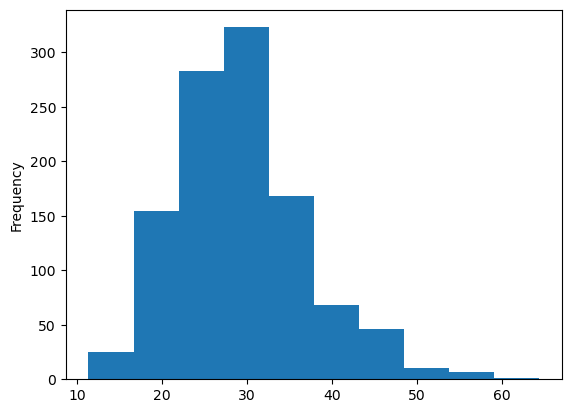

In [22]:
df.bmi.plot(kind='hist')

In [23]:
#Since bmi is moderately skewed, we use the median to impute
df.bmi = df.bmi.fillna(df.bmi.median())

In [24]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [25]:
#Got an error when running the model, so going to check dtypes. Find age as object.
df.dtypes

gender                 int64
age                   object
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [26]:
#See whats the odd one
df.age.value_counts()

79     26
57     24
78     24
52     23
81     22
       ..
3       7
35      7
12      6
4       6
*82     1
Name: age, Length: 84, dtype: int64

In [27]:
#Find index of corrupted age and see if the row makes sense
df[df['age'] == '*82']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
586,1,*82,0,1,1,4,2,74.1,28.8,2,1


In [28]:
df.loc[586, 'age']

'*82'

In [29]:
#Sets it back to 82
df.loc[586, 'age'] = 82

In [30]:
#Set it back to int
df.age = df.age.astype('int')

In [31]:
df.dtypes

gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [32]:
y = df.stroke.values
X = df.drop('stroke', axis = 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [34]:
accuracies = {}

lr = LogisticRegression(random_state = 0, max_iter=1000)
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test)*100
accuracies['Logistic Regression'] = acc

dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, y_train)
acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree Classifier'] = acc

rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
acc = rf.score(X_test, y_test)*100
accuracies['Random Forest Classifier'] = acc

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)*100
accuracies['KNeighbors Classifier'] = acc

for k,v in accuracies.items():
    print(f"{k}: {v:.2f}%".format())

Logistic Regression: 86.84%
Decision Tree Classifier: 78.65%
Random Forest Classifier: 84.21%
KNeighbors Classifier: 83.04%


/home/tooshy/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**Interpretation** LogisticRegression shows the best accuracy and should be used for the prediction for stroke as it has the highest accuracy.

In [35]:
from sklearn.metrics import confusion_matrix

y_head_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_head_lr)

y_head_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

y_head_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_head_rf)

y_head_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_head_knn)

/home/tooshy/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:title={'center':'KNeighbors Classifier Confusion Matrix'}>

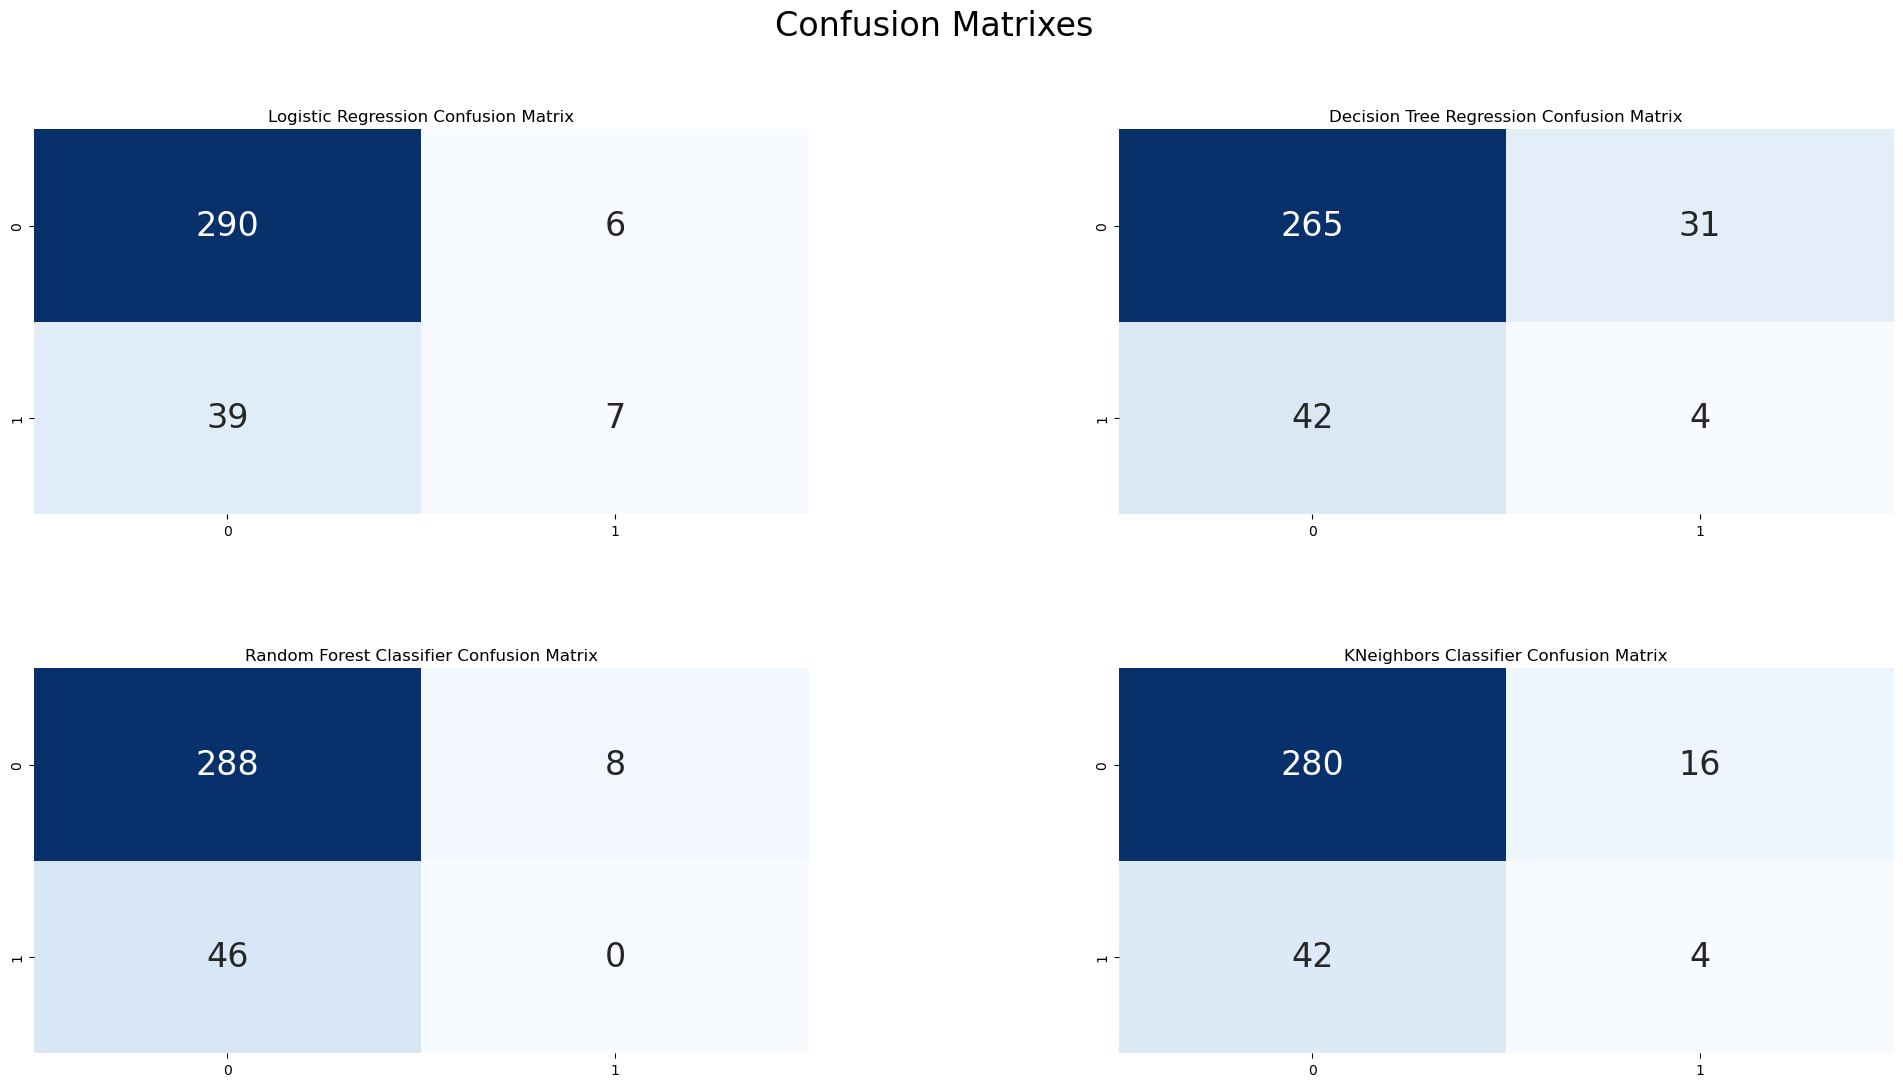

In [36]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Regression Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("KNeighbors Classifier Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

**Interpretation**: From the confusion matrices, it supports the accuracy of the logistic regression being the best performing model with the highest True negatives/True Positives as well as lower false positives/false negatives.

**Note:** Below cells are not part of Homework 3. Homework3 ends here. The below cells are a continuation for the exercises that came the day afterwards. As they are tied to the same dataset I felt it was best to continue from here.

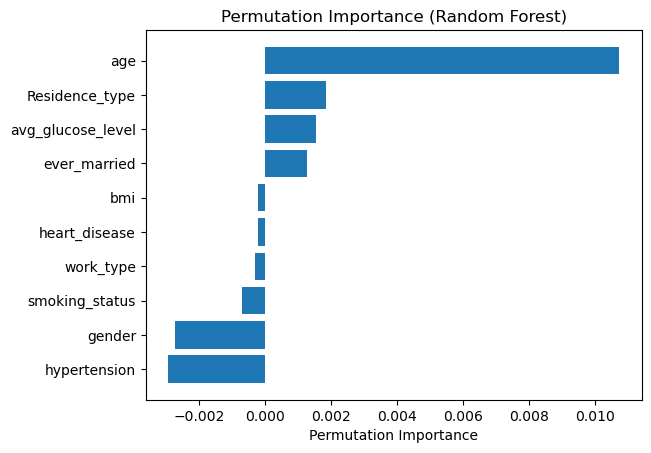

In [37]:
perm_importance = permutation_importance(lr, X_test, y_test, n_repeats=30, random_state=0)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()

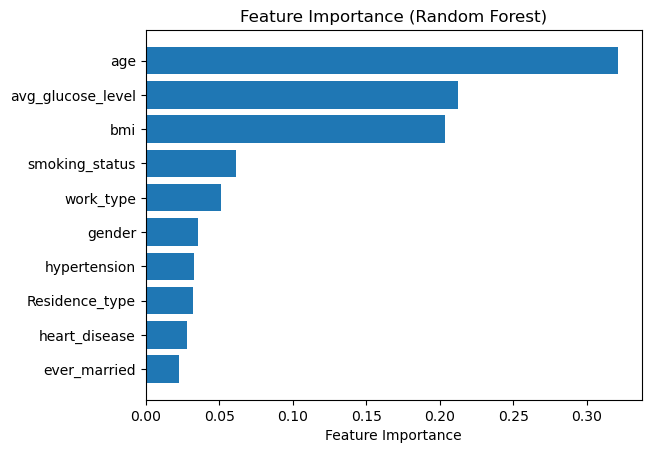

In [38]:
# Get feature importances from RandomForest
rf_feature_importances = rf.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [39]:
X = df[['heart_disease', 'avg_glucose_level', 'age']]
y = df['stroke']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 85.96%


In [42]:
X = df[['bmi', 'avg_glucose_level', 'age']]
y = df['stroke']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 85.09%


In [45]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision tree
import matplotlib.pyplot as plt
import pydotplus

In [46]:
important_features = ['heart_disease', 'avg_glucose_level', 'age']
f = df[important_features]
t = df['stroke']

In [47]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True

In [48]:
df.shape

(1137, 11)

In [49]:
df.stroke.value_counts()

0    1000
1     137
Name: stroke, dtype: int64

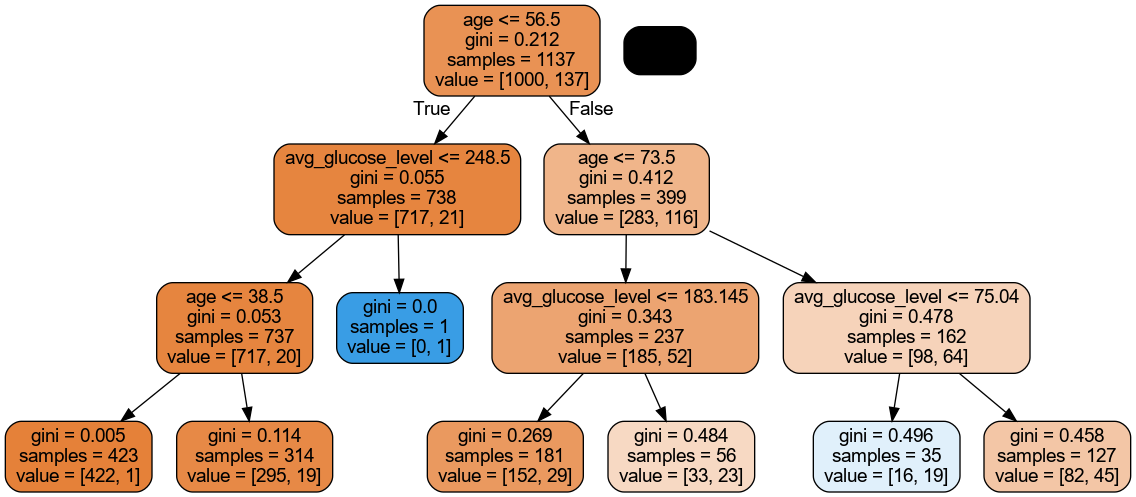

In [50]:
from IPython.display import Image
Image("tree.png")

In [57]:
kmeans_df = df.drop(['stroke'], axis=1)

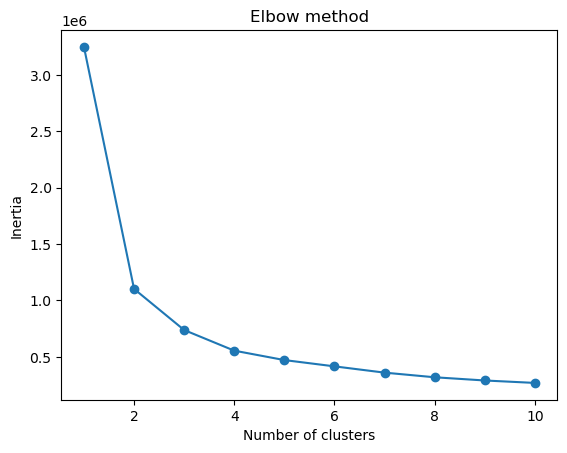

In [59]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_df)
    inertias.append(kmeans.inertia_) #main function to determine the clusters i "inertia"

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [66]:
# Fit K-Means to the data with K=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df)

# Add the cluster labels to the DataFrame
kmeans_df['Cluster'] = clusters

# Create separate dataframes for each cluster
cluster_dataframes = [kmeans_df[kmeans_df['Cluster'] == i] for i in range(4)]

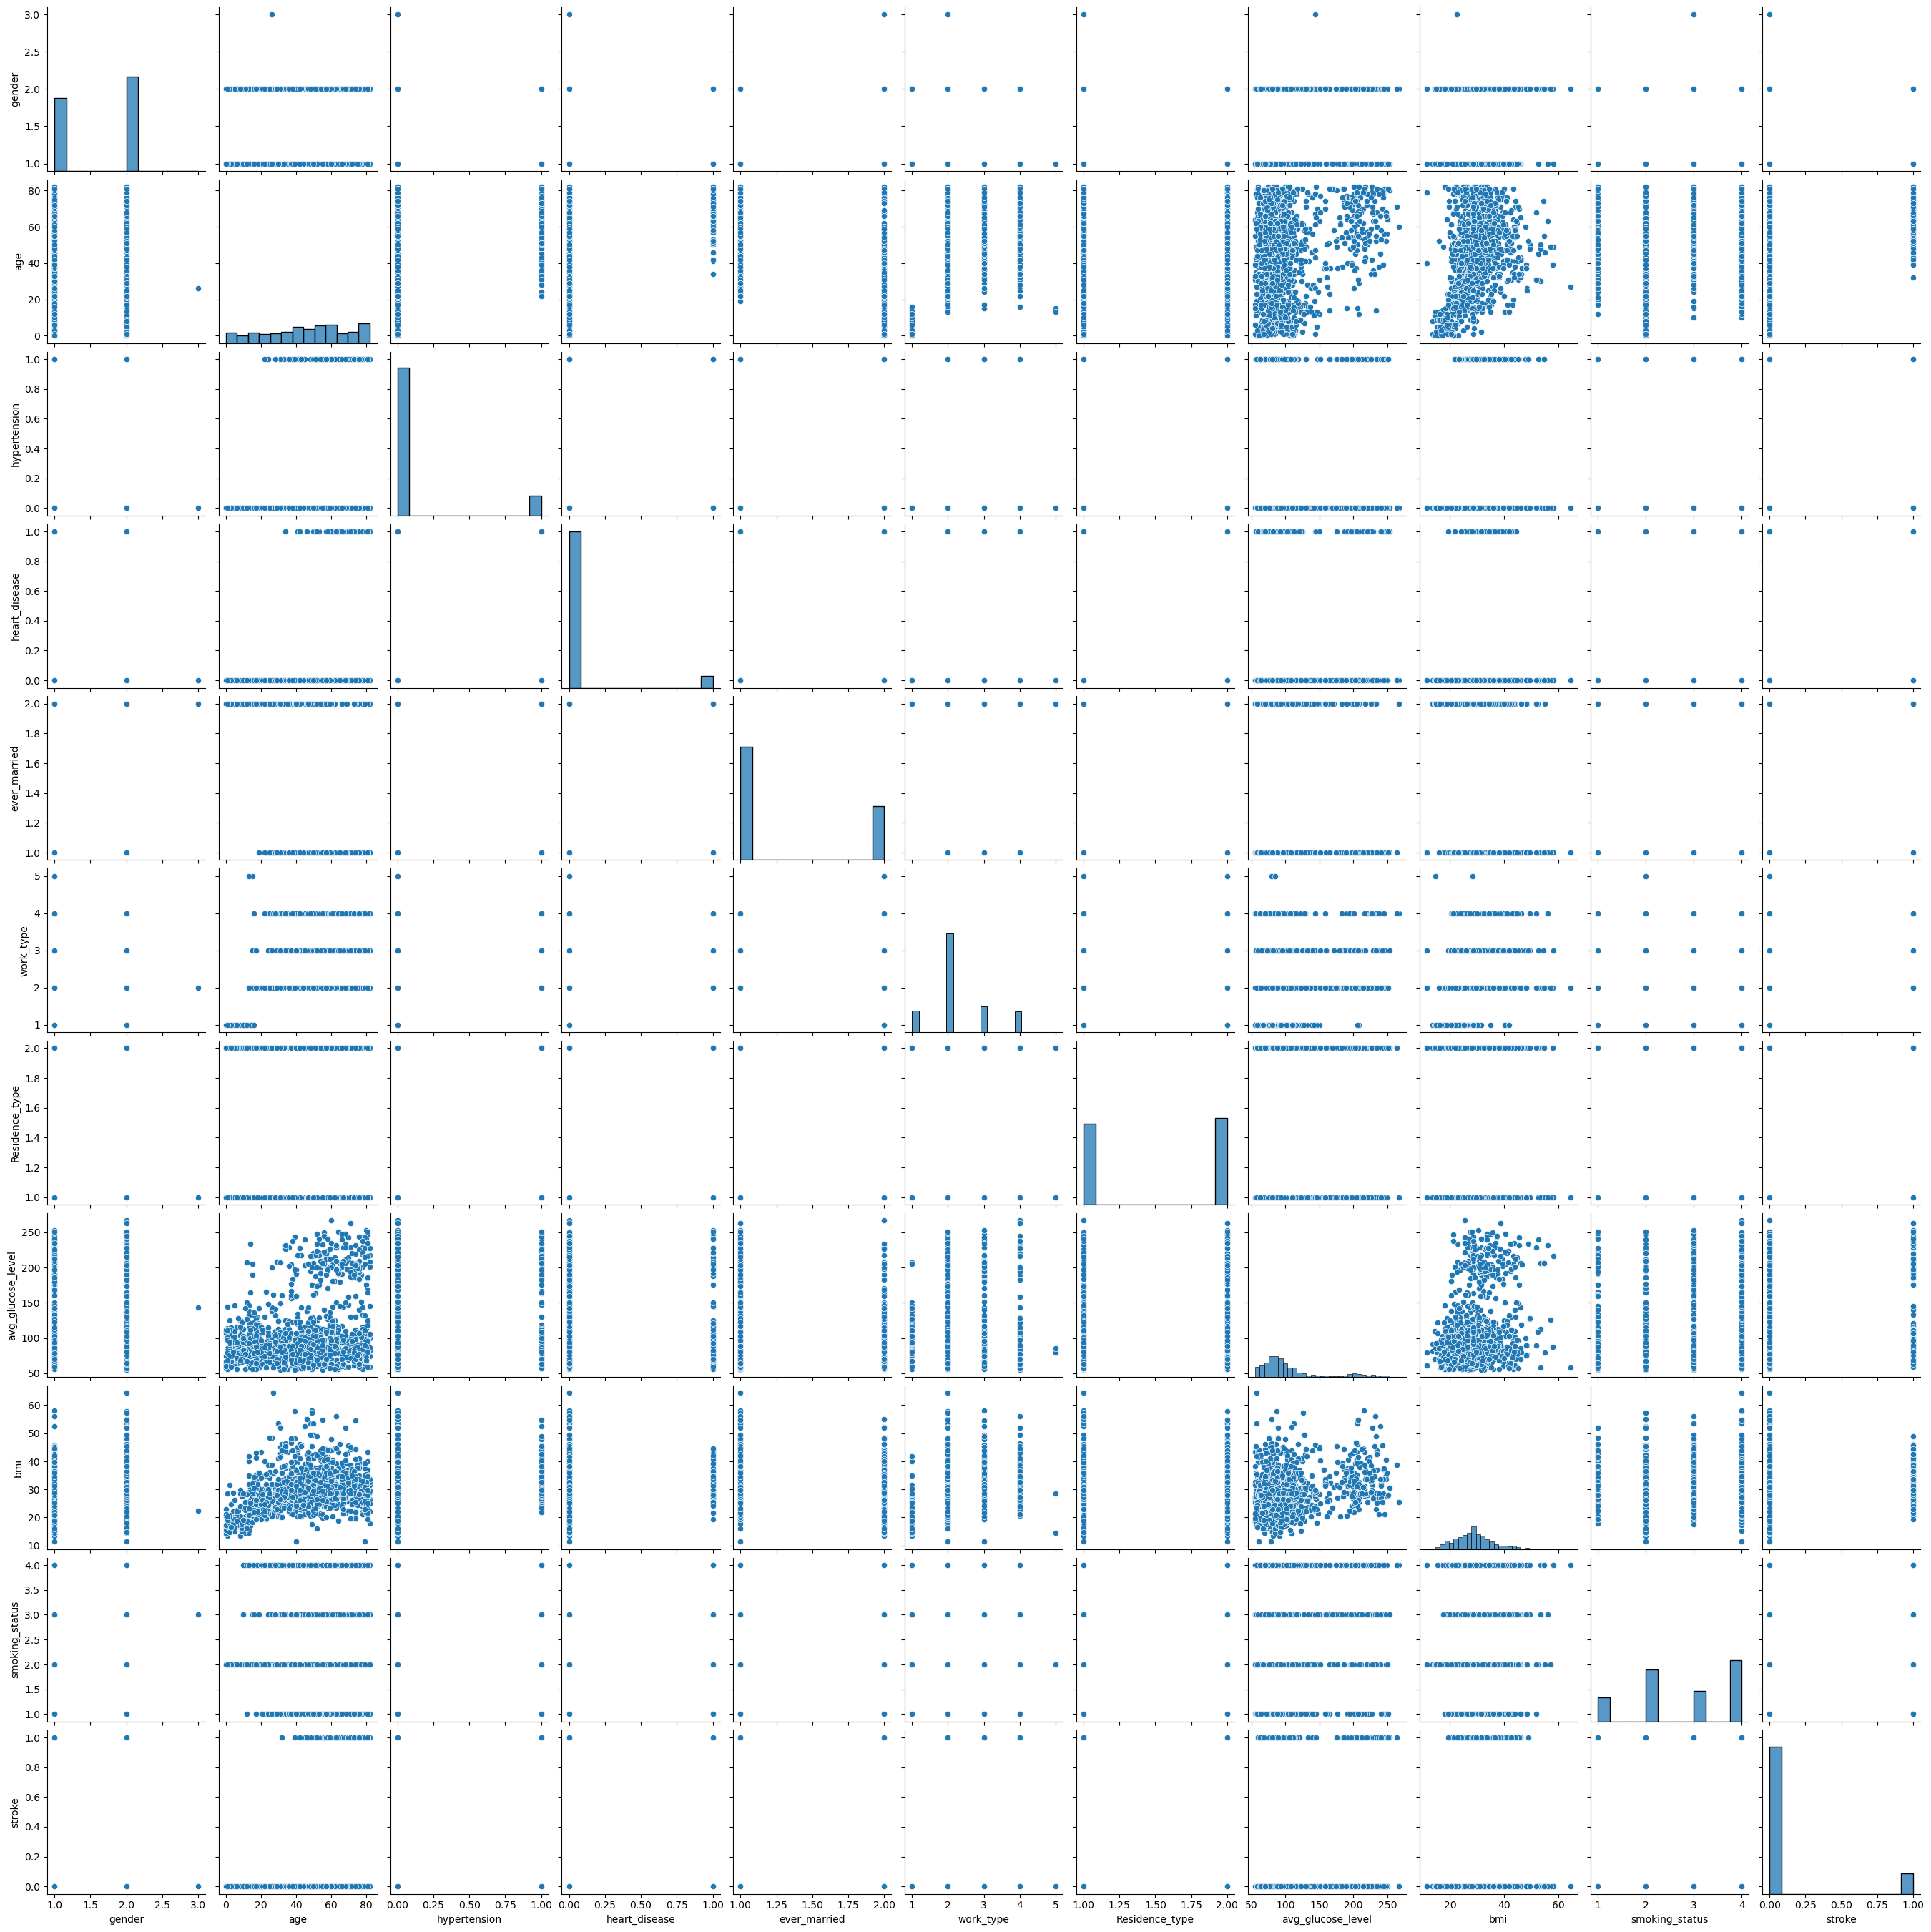

In [70]:
sns.pairplot(df)

In [67]:
kmeans_df.sample(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Cluster
322,2,74,0,0,1,3,1,95.94,27.0,4,0
815,2,79,1,0,2,4,2,98.02,22.3,3,0
1082,1,3,0,0,2,1,2,59.05,16.6,2,2


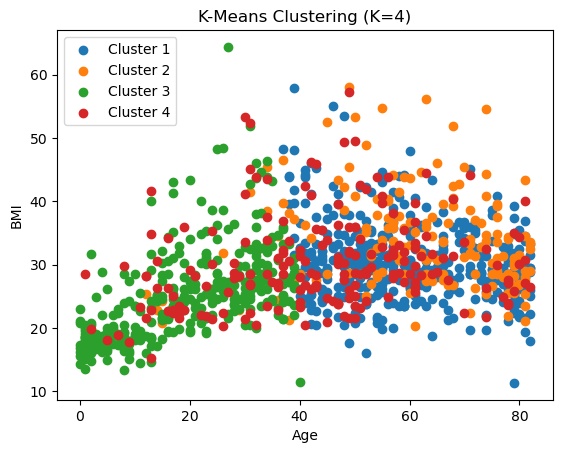

In [86]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['age'], cluster_df['bmi'], label=f'Cluster {i + 1}')

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

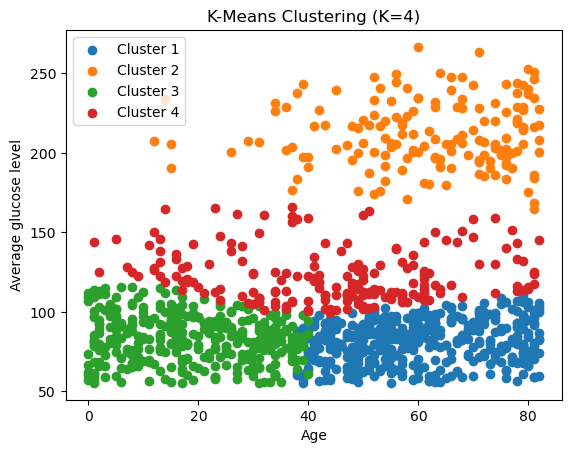

In [74]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['age'], cluster_df['avg_glucose_level'], label=f'Cluster {i + 1}')

plt.xlabel('Age')
plt.ylabel('Average glucose level')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

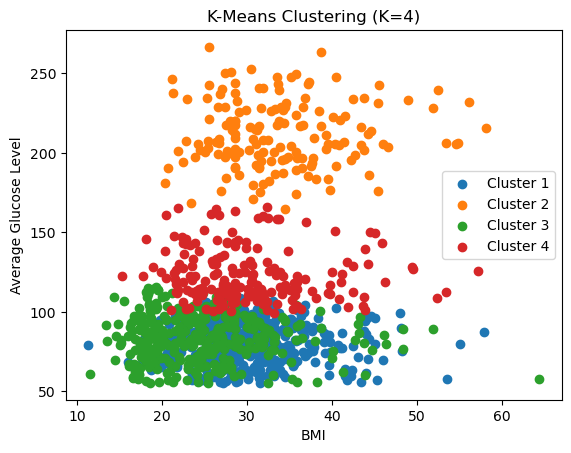

In [89]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['bmi'], cluster_df['avg_glucose_level'], label=f'Cluster {i + 1}')

plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

In [94]:
kmeans_df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Cluster
0,2,31,0,0,2,4,1,70.66,27.2,4,2


<AxesSubplot:title={'center':'Cluster 3'}, xlabel='age', ylabel='bmi'>

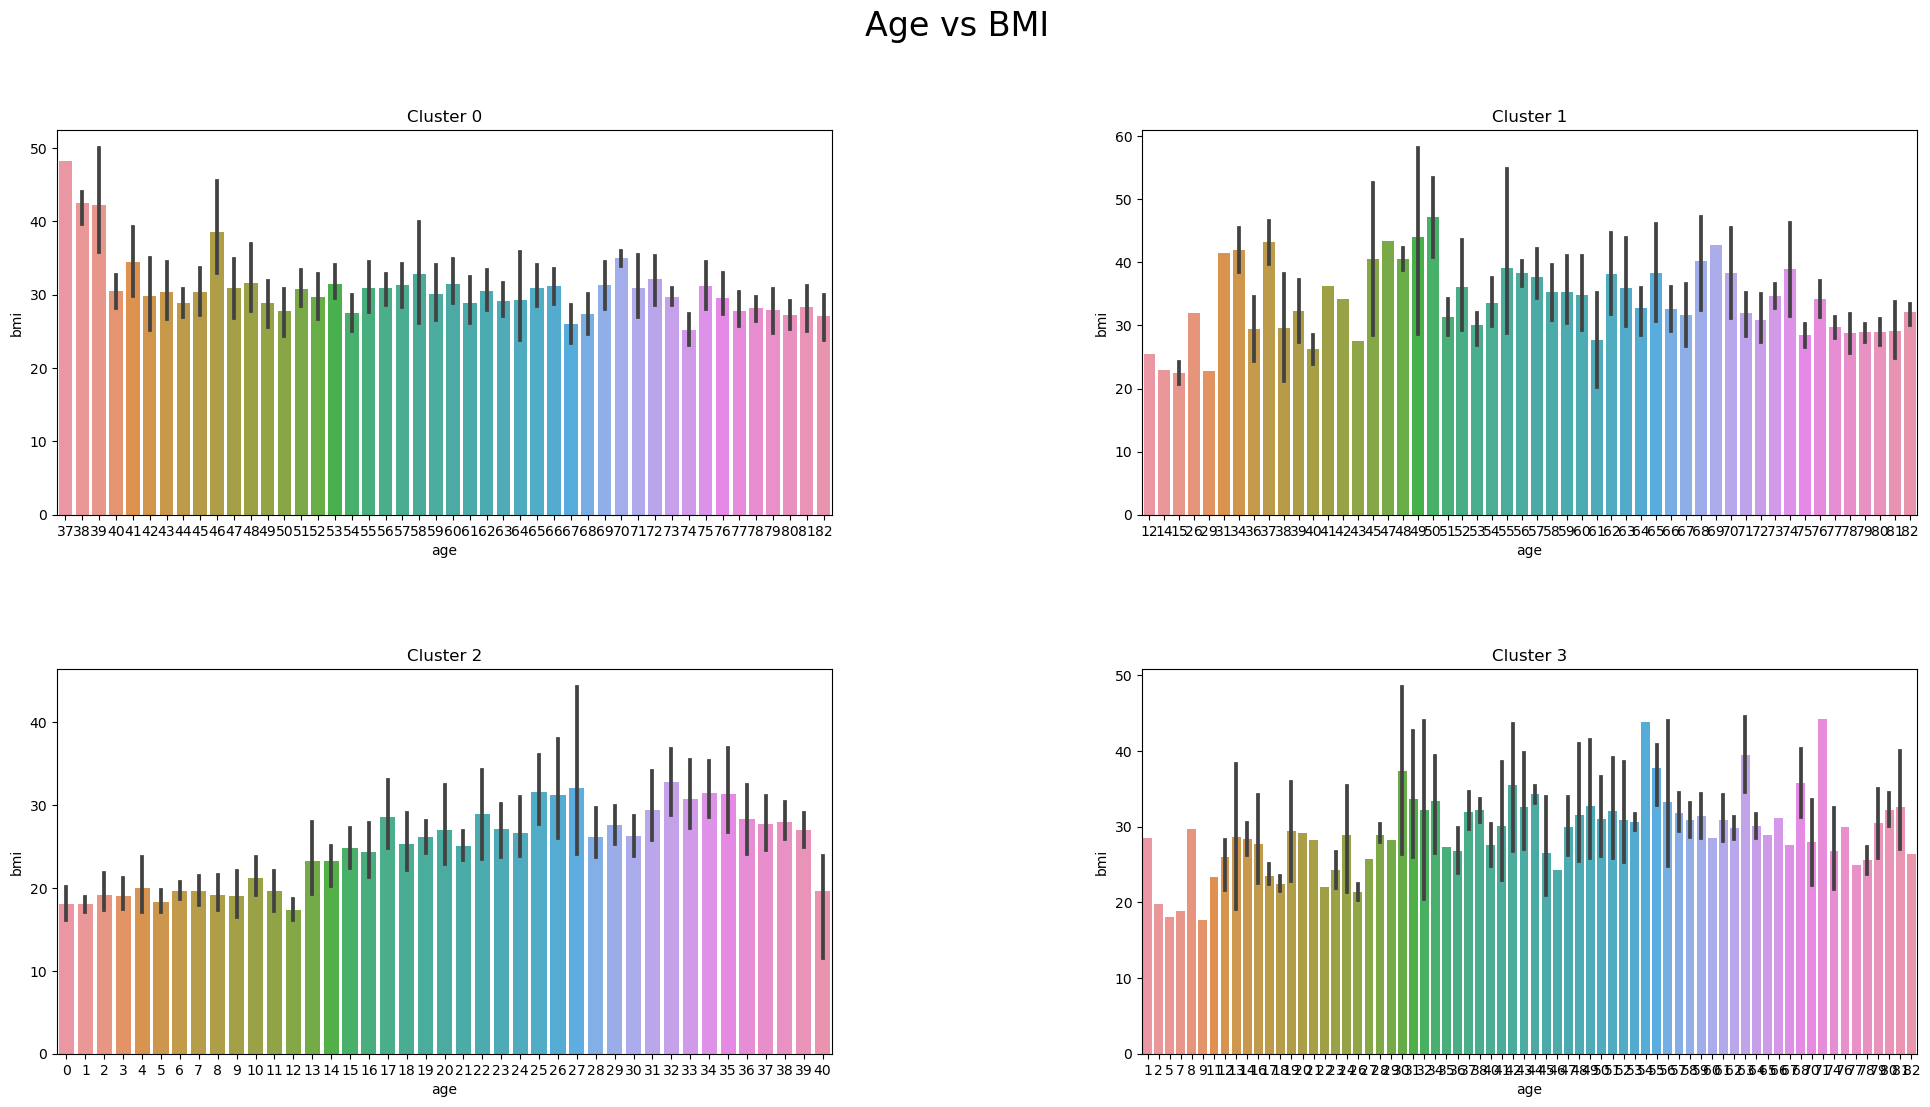

In [102]:
plt.figure(figsize=(24,12))

plt.suptitle("Age vs BMI",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Cluster 0")
sns.barplot(kmeans_df[kmeans_df['Cluster'] == 0], x='age', y='bmi')

plt.subplot(2,2,2)
plt.title("Cluster 1")
sns.barplot(kmeans_df[kmeans_df['Cluster'] == 1], x='age', y='bmi')

plt.subplot(2,2,3)
plt.title("Cluster 2")
sns.barplot(kmeans_df[kmeans_df['Cluster'] == 2], x='age', y='bmi')

plt.subplot(2,2,4)
plt.title("Cluster 3")
sns.barplot(kmeans_df[kmeans_df['Cluster'] == 3], x='age', y='bmi')

<AxesSubplot:title={'center':'Cluster 3'}, xlabel='age', ylabel='avg_glucose_level'>

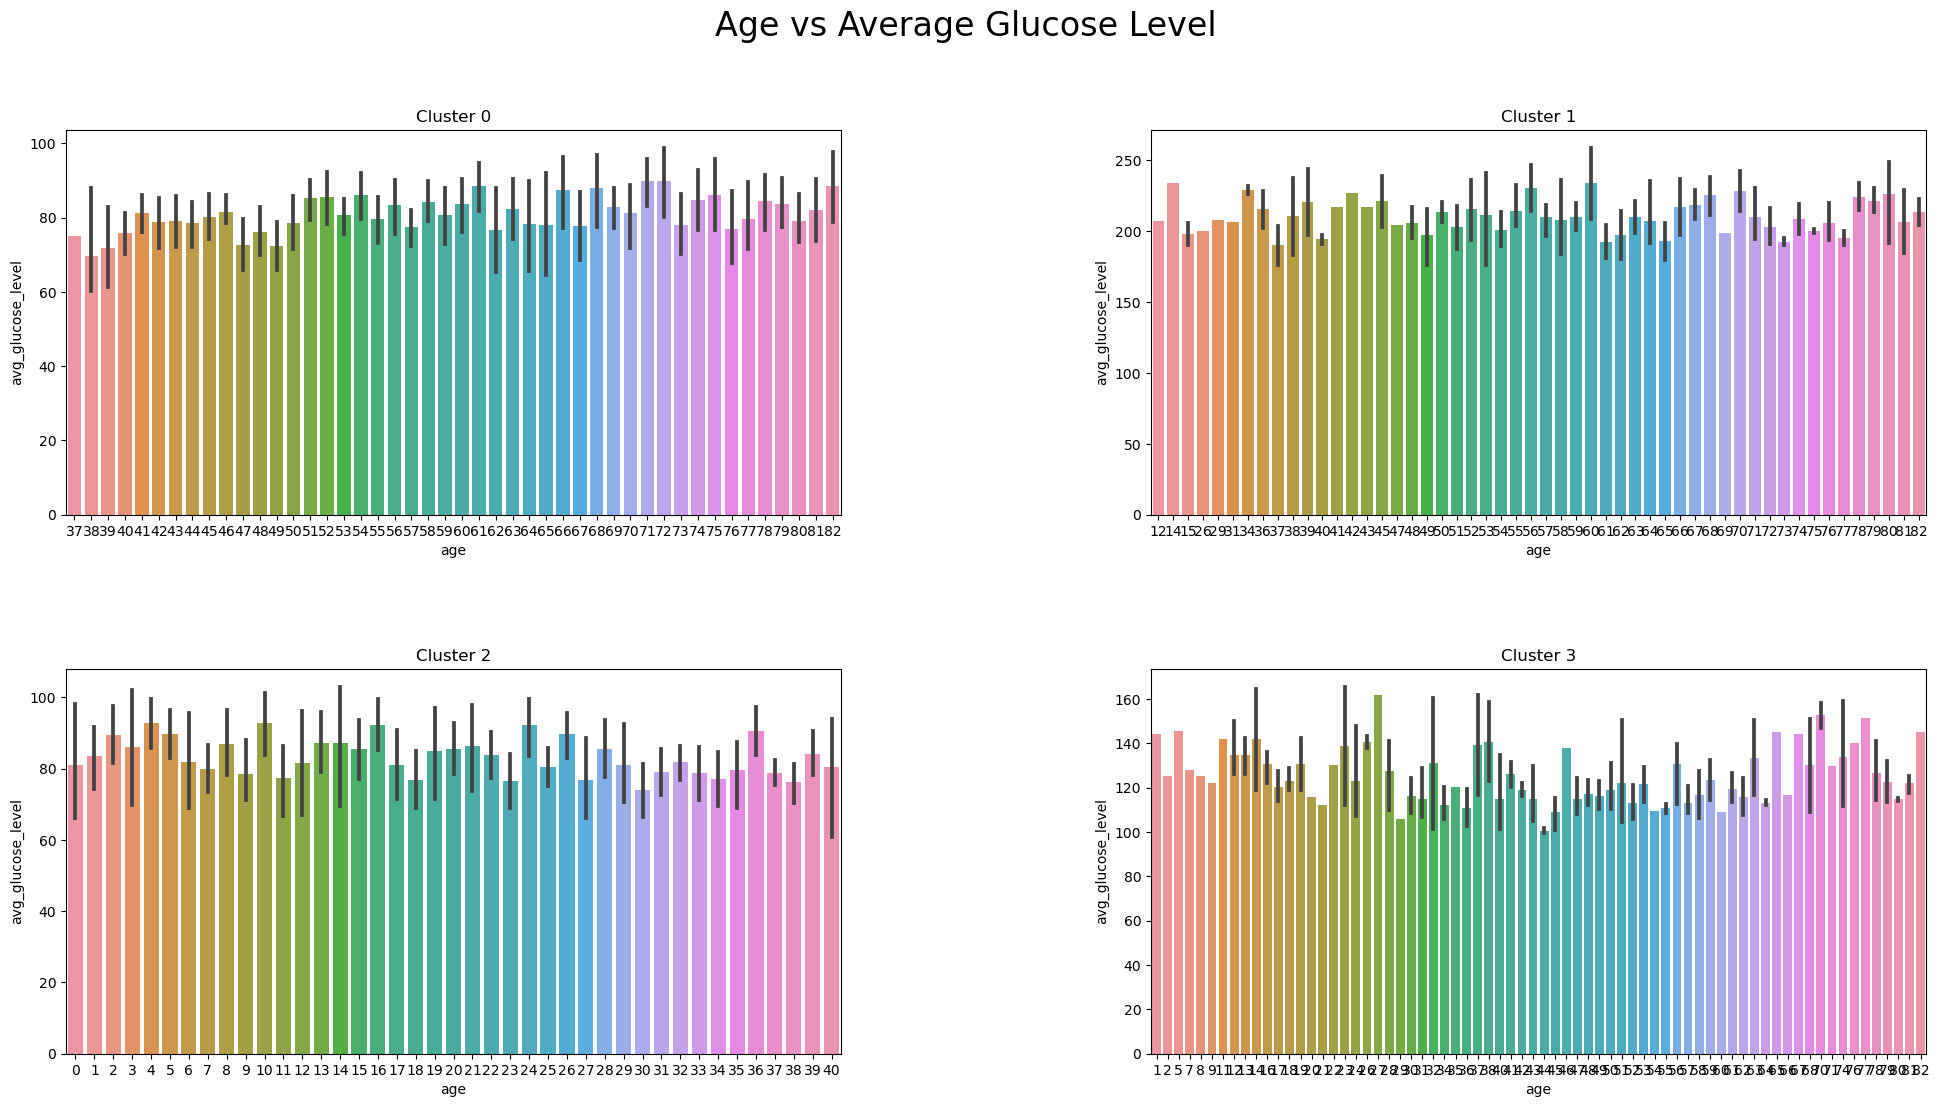

In [108]:
plt.figure(figsize=(24,12))

plt.suptitle("Age vs Average Glucose Level",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Cluster 0")
sns.barplot(kmeans_df[kmeans_df['Cluster'] == 0], x='age', y='avg_glucose_level')

plt.subplot(2,2,2)
plt.title("Cluster 1")
sns.barplot(kmeans_df[kmeans_df['Cluster'] == 1], x='age', y='avg_glucose_level')

plt.subplot(2,2,3)
plt.title("Cluster 2")
sns.barplot(kmeans_df[kmeans_df['Cluster'] == 2], x='age', y='avg_glucose_level')

plt.subplot(2,2,4)
plt.title("Cluster 3")
sns.barplot(kmeans_df[kmeans_df['Cluster'] == 3], x='age', y='avg_glucose_level')